In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
import joblib

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/My Drive/train_dataset.csv')
X_test = pd.read_csv('drive/My Drive/x_test.csv')
y_test = pd.read_csv('drive/My Drive/Y_test.csv')

In [4]:
train.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [5]:
X_test.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  january_max_temp  february_min_temp  february_avg_temp  \
0         50.596774                64                 40          54.482143   
1         50.596774                64                 40          54.482143   
2         50.596774                64                 40          54.482143   
3         50.596774                64                 40          54.482143   
4         50.596774                64                 40          54.482143   

   february_max_temp  march_min_temp  march_avg_temp  march_max_temp  \
0                 66              42       56.935484              77   
1                 66              42       56.935484              77   
2                 66              42       56.935484              77   
3                 66              42       56.935484              77   
4                 66              42       56.935484              77   

   april_min_temp  april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
0              45           58.45              78            49     60.903226   
1              45           58.45              78            49     60.903226   
2              45           58.45              78            49     60.903226   
3              45           58.45              78            49     60.903226   
4              45           58.45              78            49     60.903226   

   may_max_temp  june_min_temp  june_avg_temp  june_max_temp  july_min_temp  \
0            87             51          63.15             97             53   
1            87             51          63.15             97             53   
2            87             51          63.15             97             53   
3            87             51          63.15             97             53   
4            87             51          63.15             97             53   

   july_avg_temp  july_max_temp  august_min_temp  august_avg_temp  \
0      64.258065             85               53        65.854839   
1      64.258065             85               53        65.854839   
2      64.258065             85               53        65.854839   
3      64.258065             85               53        65.854839   
4      64.258065             85               53        65.854839   

   august_max_temp  september_min_temp  september_avg_temp  \
0               88                  54           69.766667   
1               88                  54           69.766667   
2               88                  54           69.766667   
3               88                  54           69.766667   
4               88                  54           69.766667   

   september_max_temp  october_min_temp  october_avg_temp  october_max_temp  \
0                 104                48         64.193548                91   
1                 104                48         64.193548                91   
2                 104                48         64.193548                91   
3                 104                48         64.193548                91   
4                 104   

In [6]:
y_test.head()

id    site_eui
0  75757  166.588554
1  75758  259.381565
2  75759  158.537090
3  75760  261.441520
4  75761  242.967711

In [7]:
print('Shape of train_data:',train.shape)
print('Shape of X_test_data:',X_test.shape)
print('Shape of y_test_data:',y_test.shape)

Shape of train_data: (75757, 64)
Shape of X_test_data: (9705, 63)
Shape of y_test_data: (9705, 2)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [9]:
train.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  february_max_temp  \
count       75757.000000       75757.000000       75757.000000   
mean           11.720567          35.526837          58.486278   
std            12.577272           8.866697           8.414611   
min           -13.000000          13.250000          38.000000   
25%             2.000000          31.625000          55.000000   
50%             9.000000          34.107143          61.000000   
75%            20.000000          40.879310          62.000000   
max            48.000000          65.107143          89.000000   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
count    75757.000000    75757.000000    75757.000000    75757.000000   
mean        21.606281       44.469292       70.897831       32.037171   
std         10.004303        6.657142        7.680982        5.577279   
min         -9.000000       25.854839       53.000000       15.000000   
25%         13.000000       38.096774       62.000000       26.000000   
50%         25.000000       44.516129       71.000000       32.000000   
75%         27.000000       49.354839       78.000000       37.000000   
max         52.000000       69.758065       95.000000       52.000000   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
count    75757.000000    75757.000000  75757.000000  75757.000000   
mean        53.784863       82.661932     44.706179     63.742547   
std          2.500473        4.101028      4.200319      2.792919   
min         40.280000       62.000000     23.000000     46.950000   
25%         52.333333       80.000000     42.000000     62.790323   
50%         53.333333       82.000000     45.000000     62.887097   
75%         54.766667       87.000000     49.000000     65.096774   
max         74.500000      104.000000     58.000000     82.112903   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
count  75757.000000   75757.000000   75757.000000   75757.000000   
mean      88.987856      51.131763      71.066384      91.400280   
std        2.864669       3.415926       2.861681       3.604068   
min       64.000000      30.000000      54.100000      67.000000   
25%       88.000000      50.000000      70.983333      89.000000   
50%       89.000000      52.000000      72.250000      90.000000   
75%       91.000000      53.000000      72.450000      94.000000   
max      112.000000      68.000000      89.550000     119.000000   

       july_min_temp  july_avg_temp  july_max_temp  august_min_temp  \
count   75757.000000   75757.000000   75757.000000     75757.000000   
mean       60.571604      76.596879      95.

In [10]:
null=round(100*(train.isnull().sum()/train.shape[0]),2)
null[null>0]

year_built                    2.42
energy_star_rating           35.26
direction_max_wind_speed     54.23
direction_peak_wind_speed    55.19
max_wind_speed               54.23
days_with_fog                60.45
dtype: float64

## Understanding features

**year_Factor**: anonymized year in which the weather and energy usage factors were observed  

**state_Factor**: anonymized state in which the building is located  

**building_class**: building classification  

**facility_type**: building usage type  

**floor_area**: floor area (in square feet) of the building  

**year_built**: year in which the building was constructed  

**energy_star_rating**: the energy star rating of the building  

**elevation**: elevation of the building location  

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building  

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building  

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building  

[Similarly for all other months]

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature   
exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature   falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

**precipitation_inches**: annual precipitation in inches at the location of the building  

**snowfall_inches**: annual snowfall in inches at the location of the building  

**snowdepth_inches**: annual snow depth in inches at the location of the building  

**avg_temp**: average temperature over a year at the location of the building  

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building  

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building  

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building  

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building  

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building  

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building  

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building  

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building  

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

**max_wind_speed**: maximum wind speed at the location of the building  

**days_with_fog**: number of days with fog at the location of the building  

**building_id**: building id  

### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills  

In [11]:
#Check for duplicate values
print(train.duplicated().sum())
print(X_test.duplicated().sum())

0
0


In [12]:
#Check for unique values
print([col for col in train if train[col].nunique()==1])
print([col for col in X_test if X_test[col].nunique()==1])

[]
['Year_Factor', 'days_above_110F']


### Observations:   
   
1) `year_built`, `energy_star_rating`, `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, `days_with_fog` variables have `NA` values.   
2) Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.   
3) There are no duplicates in individual dataset, however there might be duplicates in the combined version   
4) there are no constant columns in train dataset, but test dataset has 2 constant columns   

# Exploratory Data Analysis


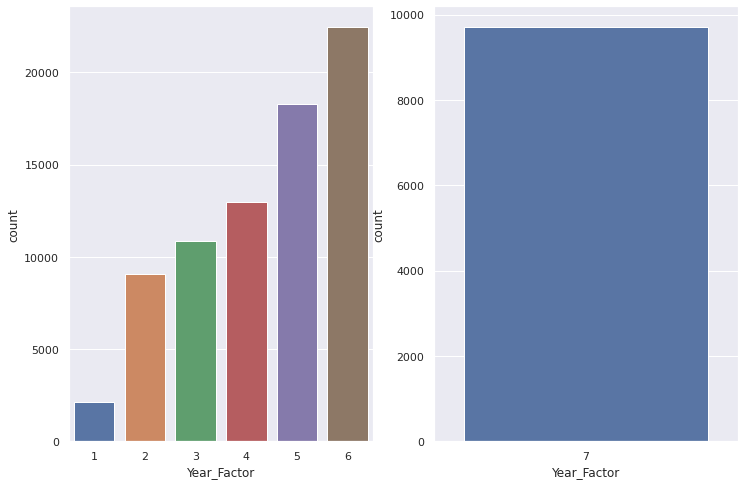

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
fig, ax =plt.subplots(1,2)
sns.countplot(train['Year_Factor'], ax=ax[0])
sns.countplot(X_test['Year_Factor'], ax=ax[1])
fig.show()


The dataset contains time variable, `Year_Factor`, that has values from 1 to 7. Assuming the values are consecutive years,`train` dataset contains the first 6 years and `test` set contains the 7th year.

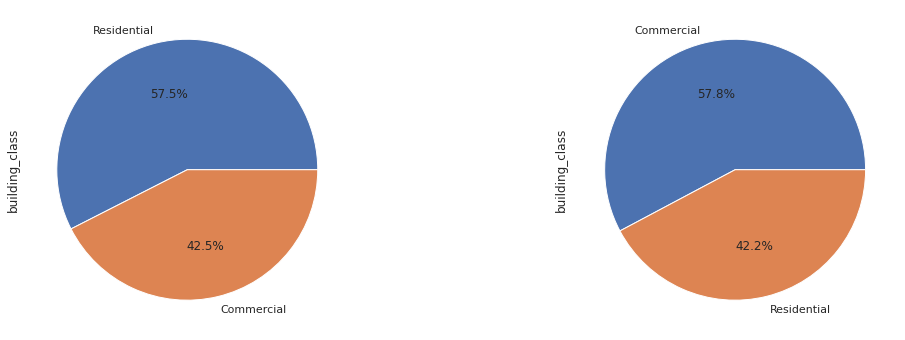

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) 
train['building_class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(1, 2, 2) 
X_test['building_class'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

train_data consists of 57.5% residential and 42.5% of commercial buildings data whereas test_data consists of 42.2% of residential and 57.8% of commercial buildings data.

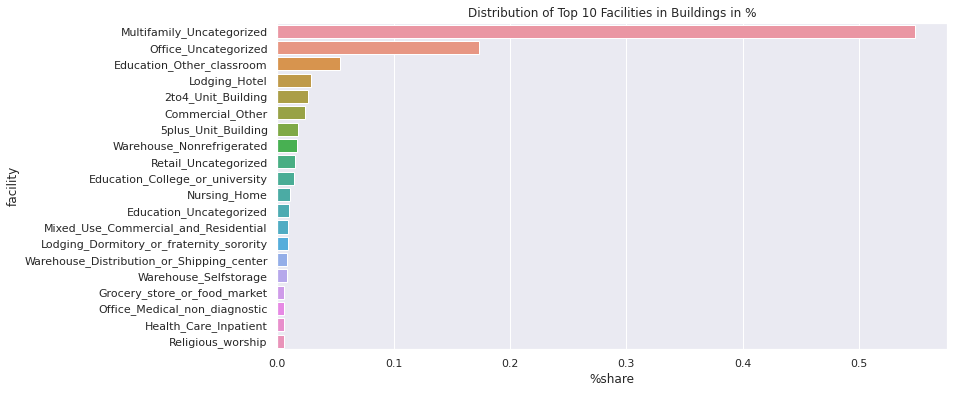

In [15]:
df = pd.DataFrame(train['facility_type'].value_counts().head(20))
df['facility'] = df.index
df.rename(columns = {'facility_type':'count'}, inplace = True)
df['%share'] = df['count']/df['count'].sum()
df.drop(columns=['count'],inplace=True)
df.reset_index(drop=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(y='facility',x='%share',data=df)
#for i in ax.containers:
    #ax.bar_label(i,)
plt.title("Distribution of Top 10 Facilities in Buildings in %")     
plt.show()

Maximum of buildings are used for flats for multifamily, followed by office, classrooms, hotels, commercial use, warehouse, retail, nursing home respectively.

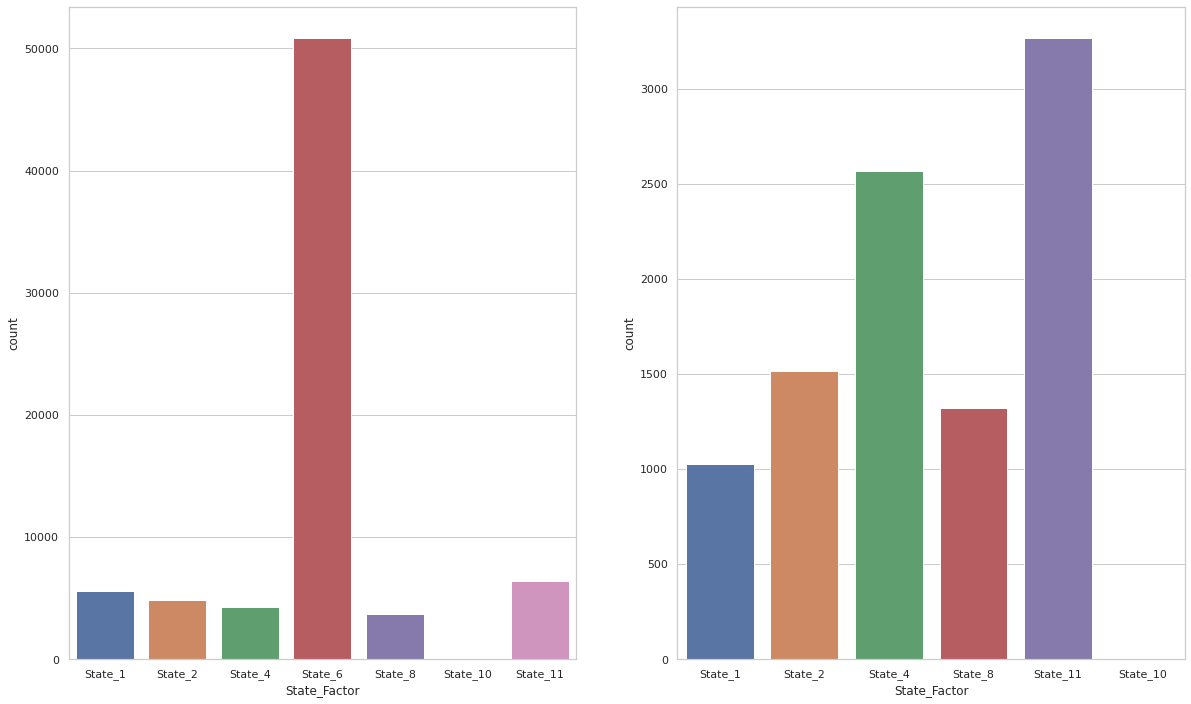

In [16]:
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")
fig, ax =plt.subplots(1,2)
sns.countplot(train['State_Factor'], ax=ax[0])
sns.countplot(X_test['State_Factor'], ax=ax[1])
fig.show()


In [17]:
#droping state_6 as it's not present in test data
train = train.drop(train[train.State_Factor == 'State_6'].index)

State_6 is not present in test_data.


In [18]:
train['year_built'].describe()

count    23913.000000
mean      1959.717350
std         46.937725
min          0.000000
25%       1927.000000
50%       1966.000000
75%       1989.000000
max       2015.000000
Name: year_built, dtype: float64

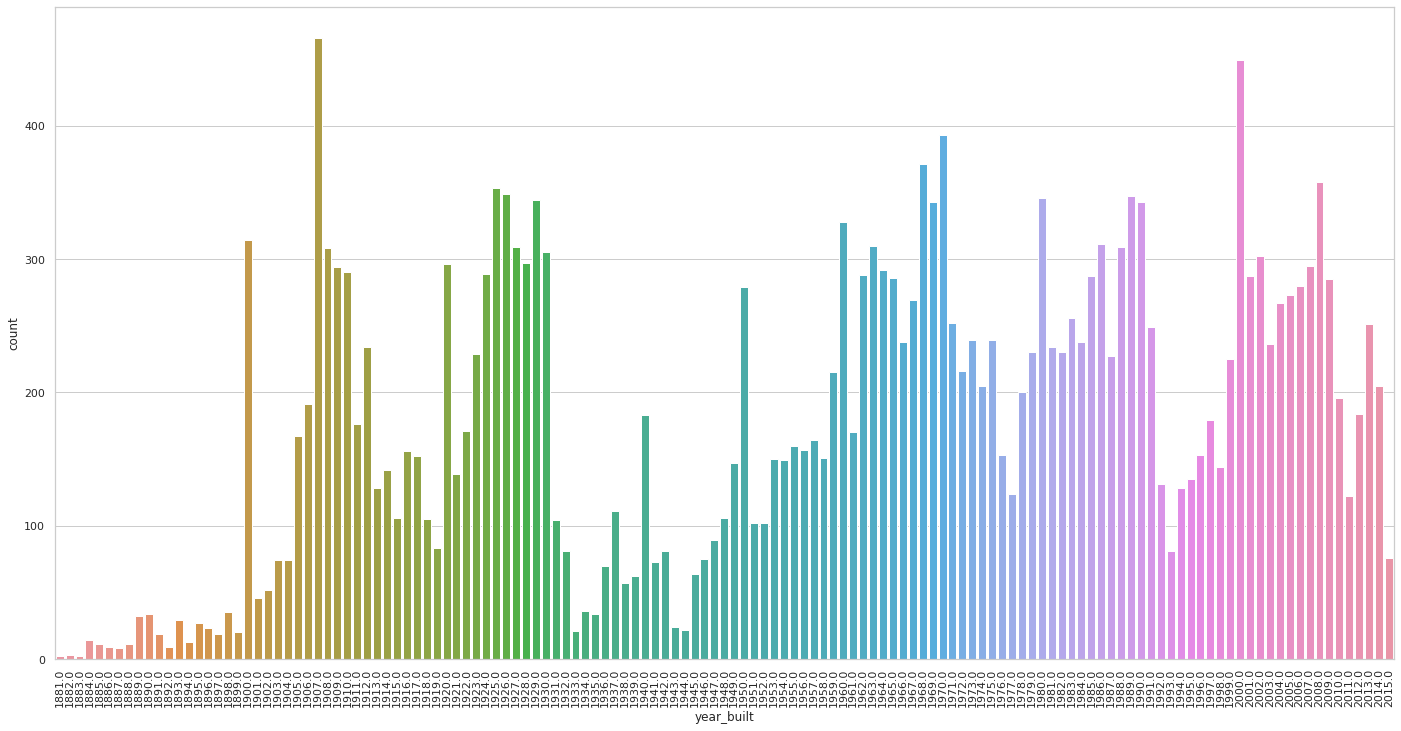

In [19]:
plt.figure(figsize=(24,12))
sns.countplot(x='year_built',data=train[(train.year_built>1880)])
plt.xticks(rotation=90)
plt.show()

Earlier there were less construction of buildings, but in 1900 there is a huge increase but after that at some years there are very less construction and at some years is less contruction of buildinngs. We find that construction of buildings was at an alltime high in 1927.
The reason for this might be the economy condition of the country.

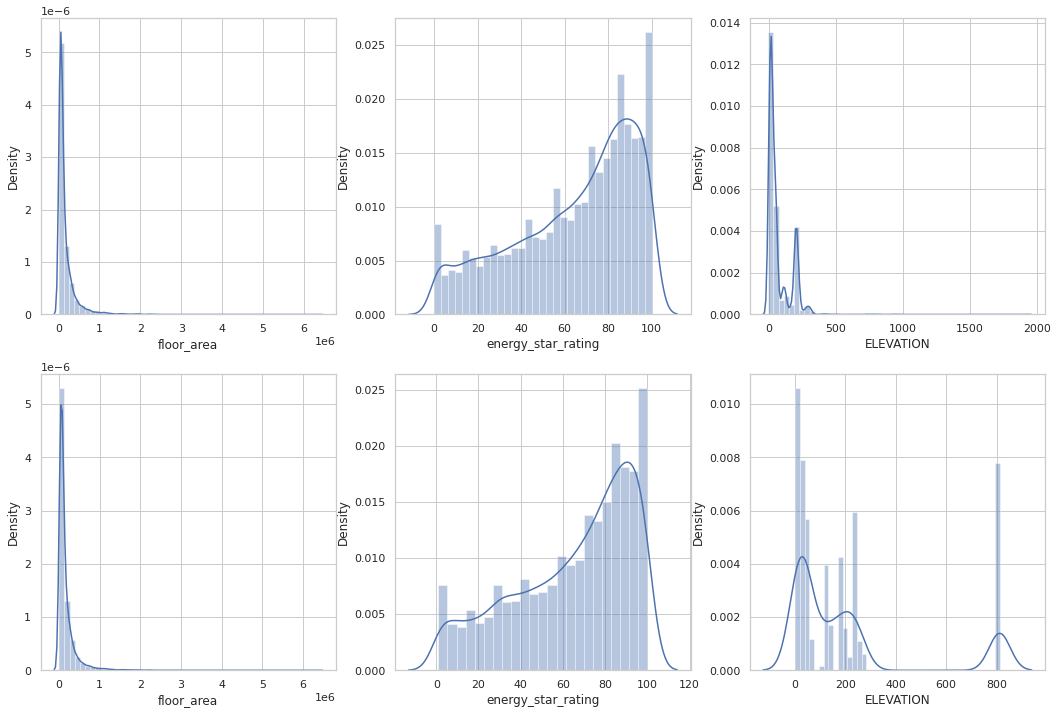

In [20]:
cols = ['floor_area', 'energy_star_rating', 'ELEVATION']
plt.figure(figsize=(18,12))

i=1
for col in cols:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.distplot(train[col])
    plt.subplot(2,3,3+i)
    sns.distplot(X_test[col])
    i+=1

plt.show()   


`train` set buildings have higher floor areas and elevation compared to `test` set buildings

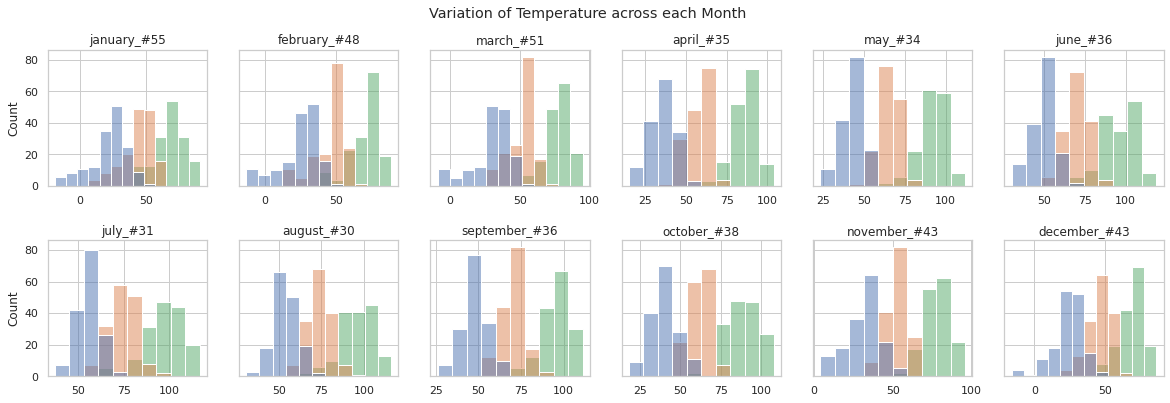

In [21]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Variation of Temperature across each Month")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(train[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(train[c[0]].unique())))
    else:
        sns.histplot(train[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(train[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.

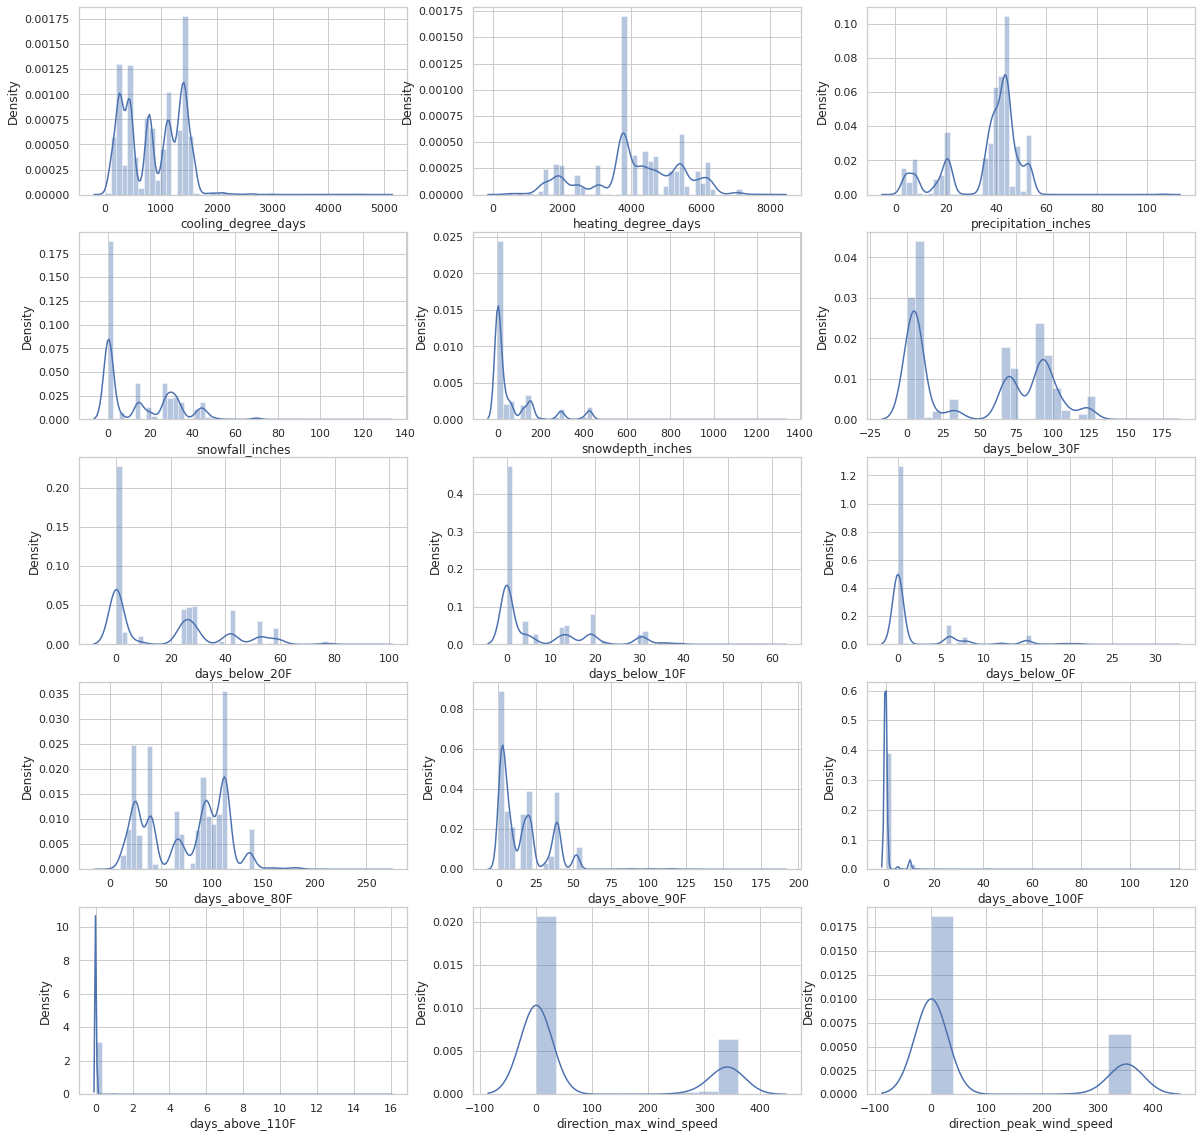

In [22]:
columns = ['cooling_degree_days','heating_degree_days','precipitation_inches','snowfall_inches','snowdepth_inches','days_below_30F','days_below_20F','days_below_10F','days_below_0F','days_above_80F','days_above_90F','days_above_100F','days_above_110F','direction_max_wind_speed','direction_peak_wind_speed']

plt.figure(figsize=(20,20))
i=1
for col in columns:
    plt.subplot(5,3,i)
    sns.set_style("whitegrid")
    sns.distplot(train[col])
    i+=1

plt.show()

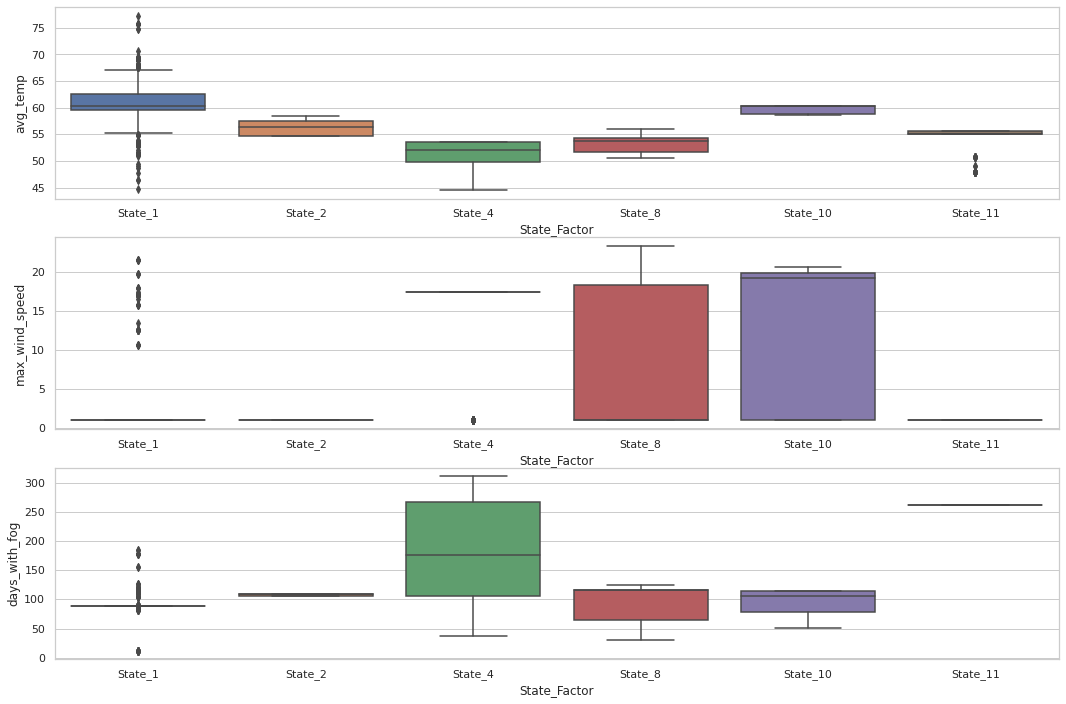

In [23]:
weather_cols = ['avg_temp', 'max_wind_speed', 'days_with_fog']
plt.figure(figsize=(18,12))

i=1
for col in weather_cols:
    plt.subplot(3,1,i)
    sns.boxplot(y=train[col],x=train['State_Factor'])
    i+=1

plt.show()   

Warm States (high temp and low wind and fog compared to other states) : State_1 > State_10 > State_2 > State_6
Cold States (Low temp and high wind and fog) : State_4 > State_8 > State_11

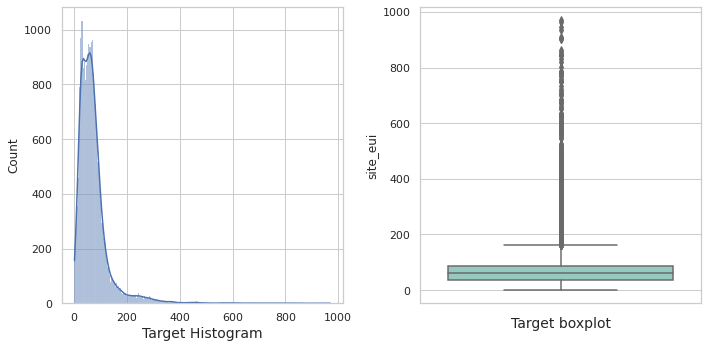

In [24]:
#Target column
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=train['site_eui'], kde=True, palette='Set5')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=train['site_eui'], palette='Set3')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

### Other Variables vs The target

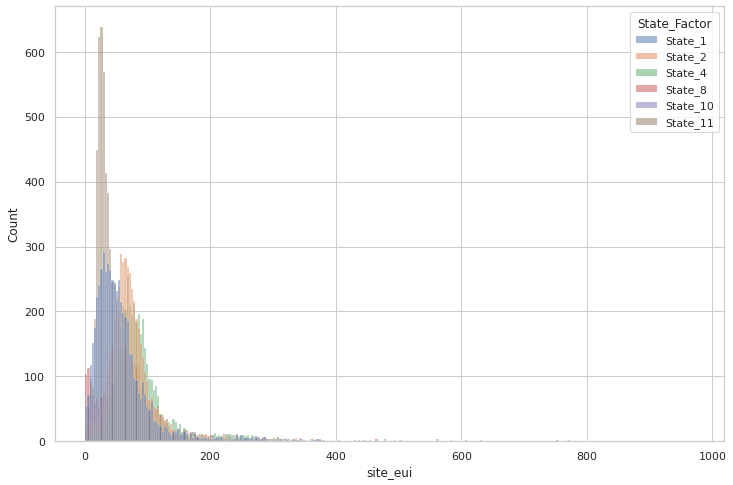

In [25]:
#EUI by states
plt.figure(figsize=(12,8))
sns.histplot(data = train, x = "site_eui",hue='State_Factor')
plt.show()

State 2 and 11 have slightly higher EUI and State 4 and 8 have lower EUI level.

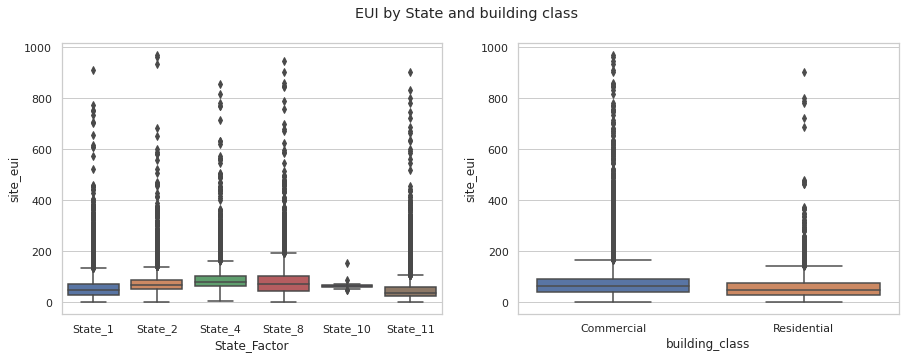

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("EUI by State and building class")

sns.boxplot(data=train, y='site_eui', x='State_Factor', ax=ax[0])
sns.boxplot(data=train, y='site_eui', x='building_class', ax=ax[1]);

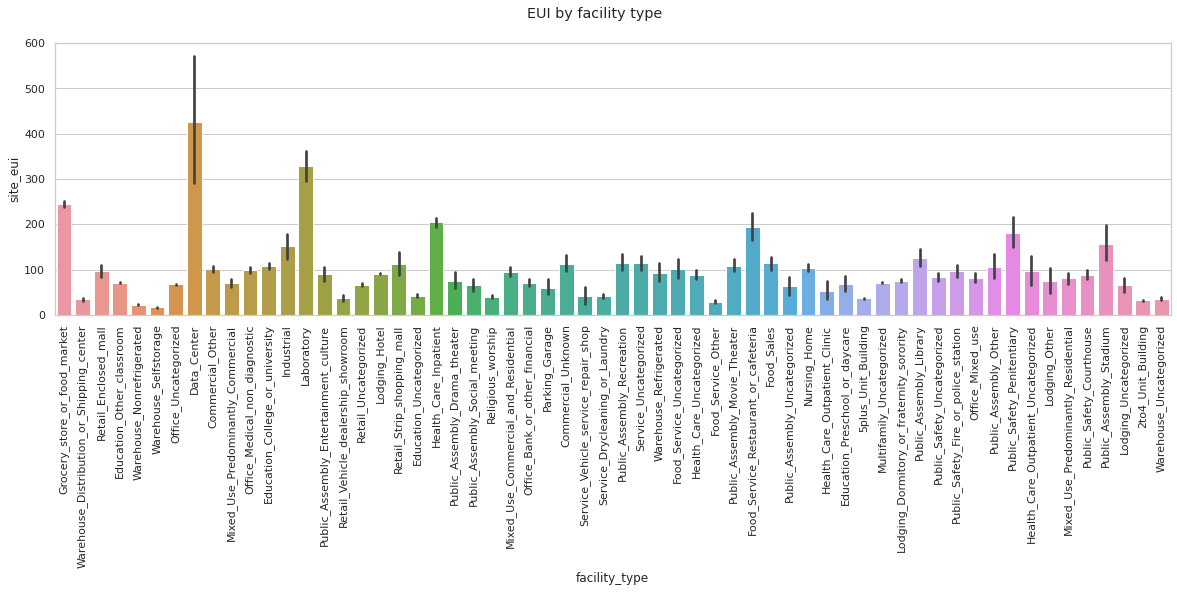

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.barplot(data=train, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Labs and Data Centers have higher EUI compared to the other types of buildings. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI. It could be the essential services must operate for longer hours, therefore, have higher EUI.

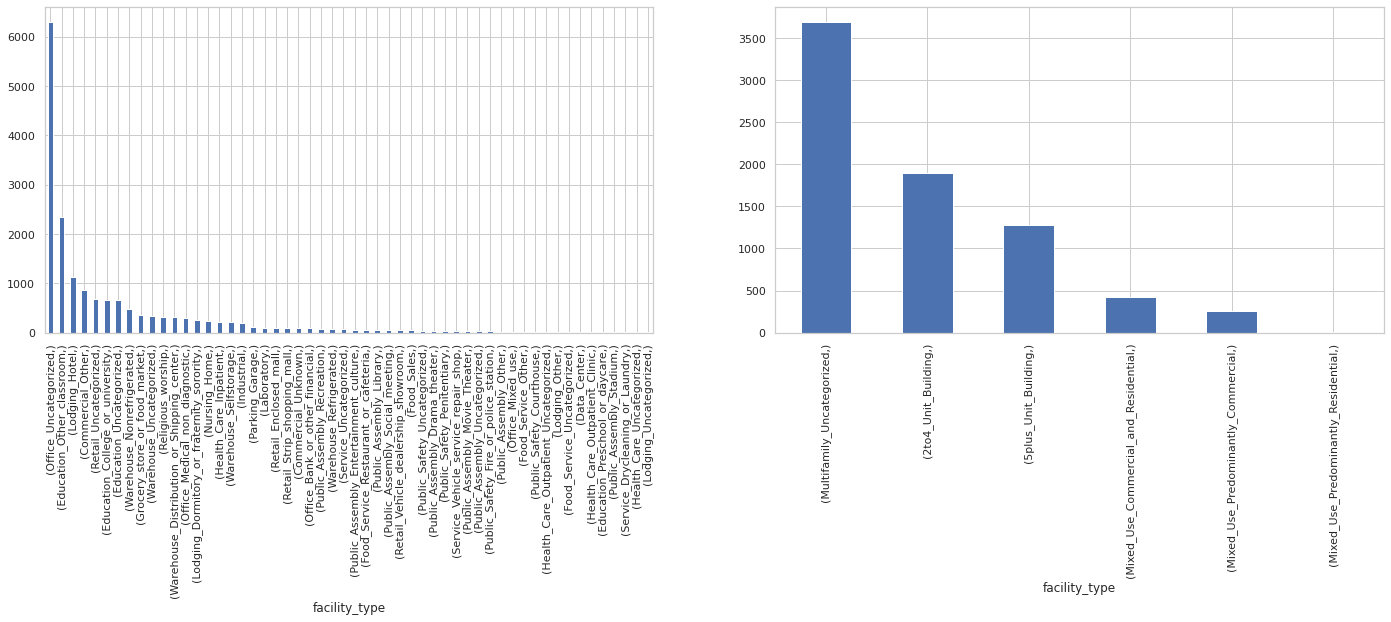

In [28]:
#Building type facilities
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
train[train['building_class']=='Commercial'][['facility_type']].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
train[train['building_class']=='Residential'][['facility_type']].value_counts().plot(kind='bar')

plt.show()

In commerciala areas, Offices are huge in number. After that Education-classrooms, hotel, commercial, retail and nursing homes are more in number than other type of buildings.

In residential areas, most buildings are constructed for multifamily type.

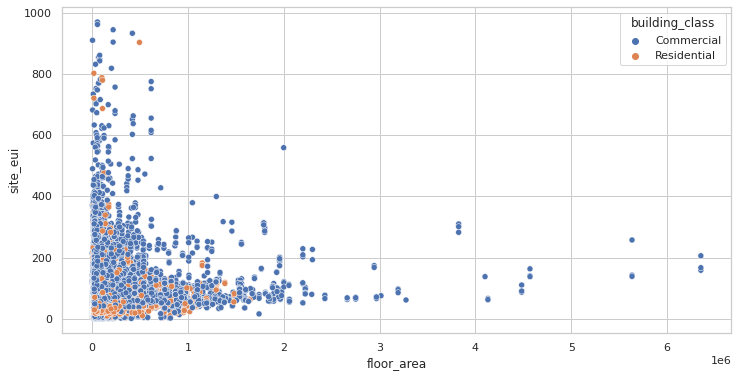

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train,x='floor_area',hue='building_class',y='site_eui')
plt.show()

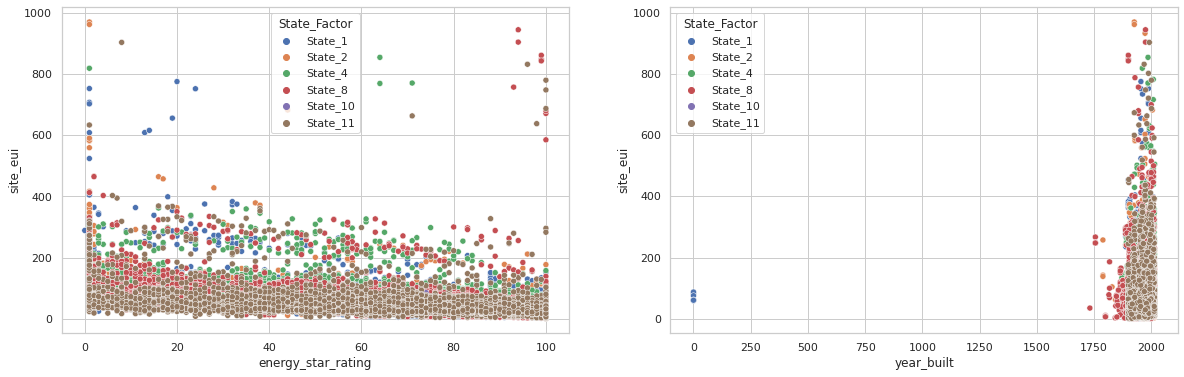

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train,y='site_eui',hue='State_Factor',x='energy_star_rating')

plt.subplot(1,2,2)
sns.scatterplot(data=train,y='site_eui',hue='State_Factor',x='year_built')
plt.show()

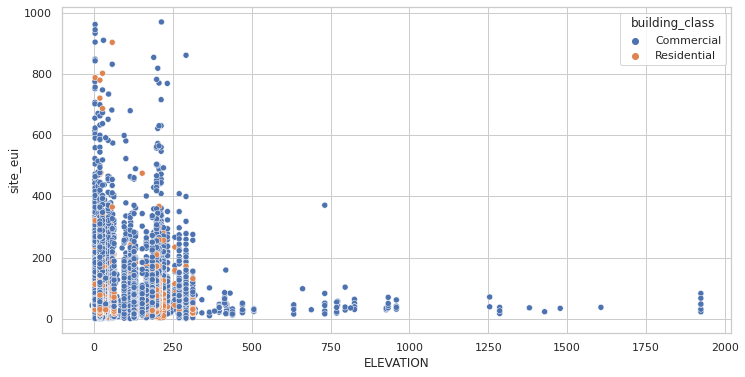

In [31]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=train, x="ELEVATION", y="site_eui",hue='building_class')
plt.show()

`floor_area` could have positive relationship with `EUI`. The younger buildings tend to have higher `EUI` which could be because building height and size have increased over the years. It looks like the Higher the `energy_star_rating` is, the lower the `EUI` becomes.

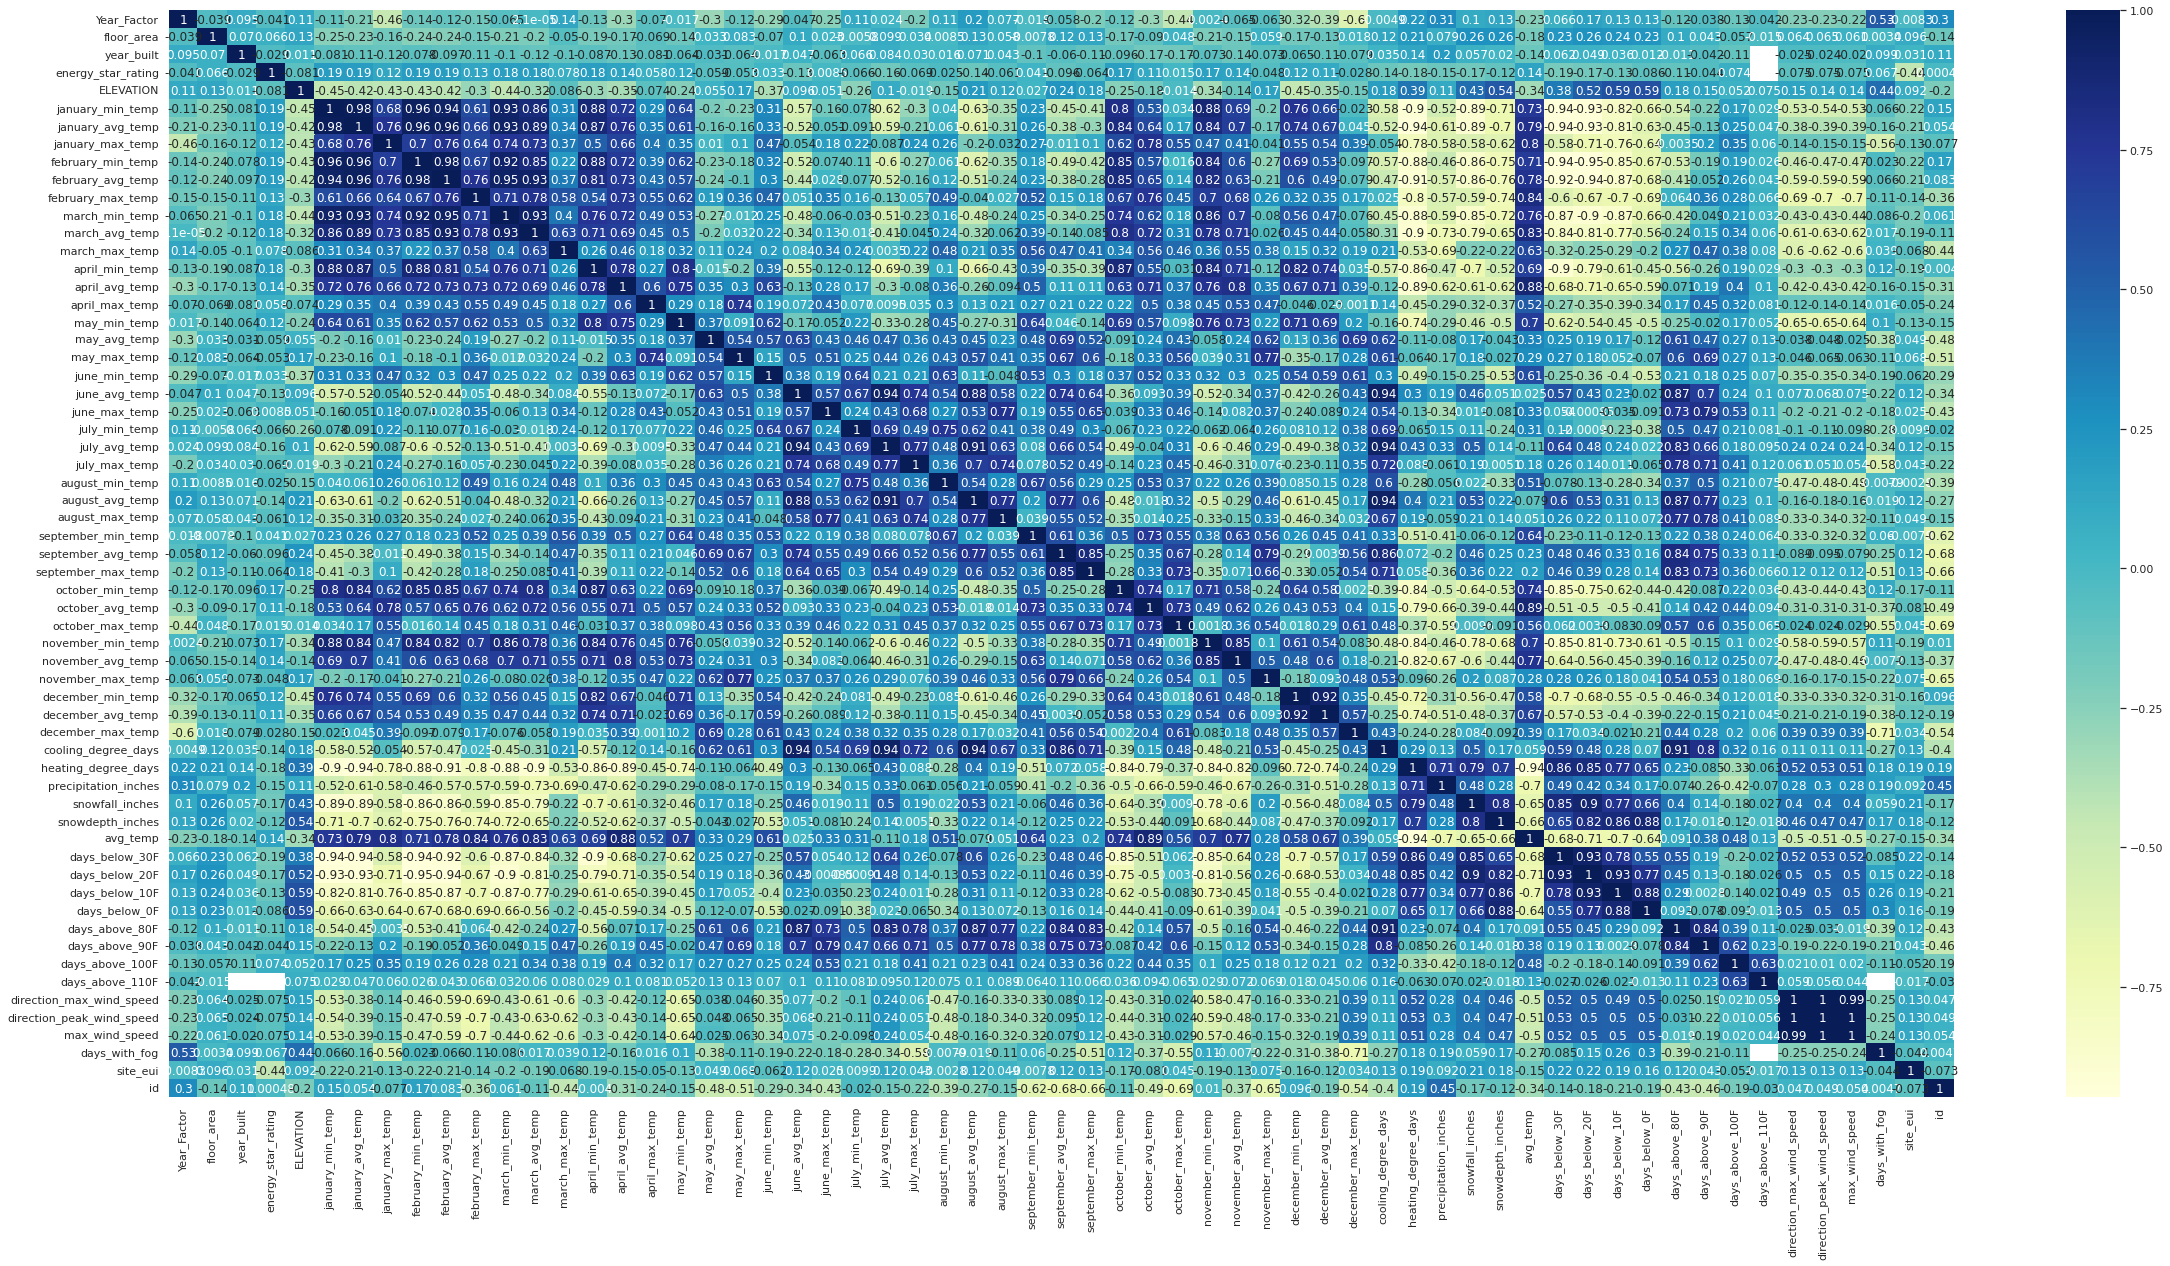

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

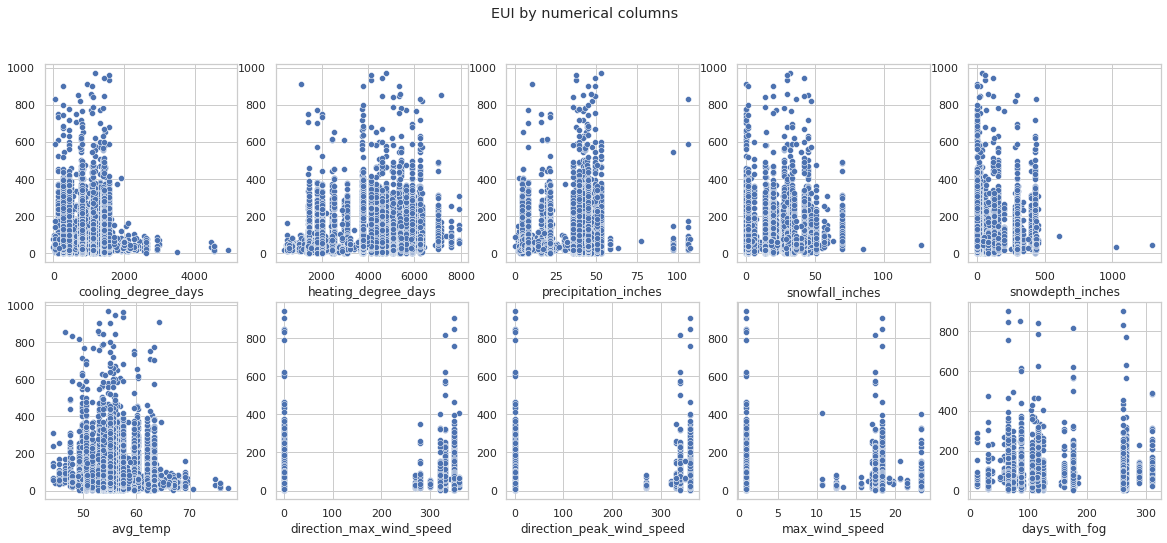

In [33]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp', 
      'direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed', 
      'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=train, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

The most data points are in lower number of `cooling_degree_days` and higher number of`heating_degree_days`. The majority of the datapoints are also in the lower levels of `snowfall_inches` and `snowdepth_inches`. `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, and `days_with_fog` columns have the `NA` values of over 50%. No relationship between `EUI` and the weather related numerica columns can be observed from the plot.

### Observations

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 removed training data should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

## Preprocessing

In [34]:
#Removing duplicates
groupby_cols = ['State_Factor','building_class','facility_type','floor_area','year_built']
train = train.sort_values(by=groupby_cols+['Year_Factor']).reset_index(drop=True)
train.loc[:,train.dtypes=='object'].columns

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [35]:
train.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
year_built                    1004
energy_star_rating            6556
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp       

In [36]:
null_cols = ['energy_star_rating','year_built','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train[null_cols] = imp.fit_transform(train[null_cols])
X_test[null_cols] = imp.fit_transform(X_test[null_cols])

In [37]:
train.isnull().sum()

Year_Factor                  0
State_Factor                 0
building_class               0
facility_type                0
floor_area                   0
year_built                   0
energy_star_rating           0
ELEVATION                    0
january_min_temp             0
january_avg_temp             0
january_max_temp             0
february_min_temp            0
february_avg_temp            0
february_max_temp            0
march_min_temp               0
march_avg_temp               0
march_max_temp               0
april_min_temp               0
april_avg_temp               0
april_max_temp               0
may_min_temp                 0
may_avg_temp                 0
may_max_temp                 0
june_min_temp                0
june_avg_temp                0
june_max_temp                0
july_min_temp                0
july_avg_temp                0
july_max_temp                0
august_min_temp              0
august_avg_temp              0
august_max_temp              0
septembe

In [38]:
#check for skewed values
train.skew(axis = 0, skipna = True).sort_values(ascending=False).head()

days_above_110F    48.512948
days_above_100F    13.684882
floor_area          6.919998
ELEVATION           4.503115
site_eui            4.338948
dtype: float64

In [39]:
skew_cols = ['days_above_110F','days_above_100F']
train.drop(skew_cols,axis=1,inplace=True)

In [40]:
drop_cols = ['days_above_110F','days_above_100F']
X_test.drop(drop_cols,axis=1,inplace=True)

In [41]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(train[['State_Factor', 'facility_type', 'building_class']], drop_first=True)

# Adding the results to the master dataframe
train = pd.concat([train, dummy1], axis=1)
train.drop(['State_Factor', 'facility_type', 'building_class'],axis=1,inplace=True)
train.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            3     10149.0      1931.0           64.116497       45.7   
1            4     10149.0      1931.0           64.116497      120.4   
2            5     10149.0      1931.0           64.116497       59.1   
3            3     10755.0      1937.0           64.116497        9.1   
4            4     10755.0      1937.0           64.116497        9.1   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                26         44.516129                64                 30   
1                41         55.096774                73                 42   
2                29         51.387097                77                 36   
3                22         44.790323                65                 25   
4                41         55.096774                73                 42   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          49.392857                 69              37       55.967742   
1          54.875000                 71              47       59.032258   
2          56.803571                 75              40       61.435484   
3          47.892857                 71              32       53.112903   
4          54.875000                 71              47       59.032258   

   march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0              77              40       61.783333              90   
1              76              47       60.100000              90   
2              85              41       60.966667              91   
3              79              34       58.866667              87   
4              76              47       60.100000              90   

   may_min_temp  may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
0            45     65.129032            91             52      70.016667   
1            51     63.483871            92             52      64.250000   
2            45     62.887097            90             55      72.983333   
3            35     62.096774            91             44      66.283333   
4            51     63.483871            92             52      64.250000   

   june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
0            104             52      71.387097            102   
1             87             53      66.903226             90   
2            106             60      74.516129            103   
3             99             48      65.693548             91   
4             87             53      66.903226             90   

   august_min_temp  august_avg_temp  august_max_temp  september_min_temp  \
0               54        71.322581               97                  47   
1               57        67.016129               80                  56   
2               58        74.774194              104                  53   
3               45        67.080645               92                  42   
4               57        67.016129               80                  56   

   september_avg_temp  september_max_temp  october_min_temp  october_avg_temp  \
0           69.133333                  98                43         61.000000   
1           68.383333                  83                55         68.661290   
2           73.583333                 105                49         69.580645   
3           65.950000                  96                35         56.967742   
4           68.383333                  83                55         68.661290   

   october_max_temp  november_min_temp  november_avg_temp  november_max_temp  \
0                84                 36          55.116667                 77   
1                95                 46          59.650000                 76   
2                96                 29          52.866667                 75   
3                85                 31          52.516667                 76   
4                95            

In [42]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(X_test[['State_Factor', 'facility_type', 'building_class']], drop_first=True)

# Adding the results to the master dataframe
X_test = pd.concat([X_test, dummy2], axis=1)
X_test.drop(['State_Factor', 'facility_type', 'building_class'],axis=1,inplace=True)
X_test.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            7     28484.0      1994.0                37.0        2.4   
1            7     21906.0      1961.0                55.0       45.7   
2            7     16138.0      1950.0                 1.0       59.1   
3            7     97422.0      1971.0                34.0       35.4   
4            7     61242.0      1942.0                35.0        1.8   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                38         50.596774                64                 40   
1                38         50.596774                64                 40   
2                38         50.596774                64                 40   
3                38         50.596774                64                 40   
4                38         50.596774                64                 40   

   february_avg_temp  february_max_temp  march_min_temp  march_avg_temp  \
0          54.482143                 66              42       56.935484   
1          54.482143                 66              42       56.935484   
2          54.482143                 66              42       56.935484   
3          54.482143                 66              42       56.935484   
4          54.482143                 66              42       56.935484   

   march_max_temp  april_min_temp  april_avg_temp  april_max_temp  \
0              77              45           58.45              78   
1              77              45           58.45              78   
2              77              45           58.45              78   
3              77              45           58.45              78   
4              77              45           58.45              78   

   may_min_temp  may_avg_temp  may_max_temp  june_min_temp  june_avg_temp  \
0            49     60.903226            87             51          63.15   
1            49     60.903226            87             51          63.15   
2            49     60.903226            87             51          63.15   
3            49     60.903226            87             51          63.15   
4            49     60.903226            87             51          63.15   

   june_max_temp  july_min_temp  july_avg_temp  july_max_temp  \
0             97             53      64.258065             85   
1             97             53      64.258065             85   
2             97             53      64.258065             85   
3             97             53      64.258065             85   
4             97             53      64.258065             85   

   august_min_temp  august_avg_temp  august_max_temp  september_min_temp  \
0               53        65.854839               88                  54   
1               53        65.854839               88                  54   
2               53        65.854839               88                  54   
3               53        65.854839               88                  54   
4               53        65.854839               88                  54   

   september_avg_temp  september_max_temp  october_min_temp  october_avg_temp  \
0           69.766667                 104                48         64.193548   
1           69.766667                 104                48         64.193548   
2           69.766667                 104                48         64.193548   
3           69.766667                 104                48         64.193548   
4           69.766667                 104                48         64.193548   

   october_max_temp  november_min_temp  november_avg_temp  november_max_temp  \
0                91                 43              58.05                 69   
1                91                 43              58.05                 69   
2                91                 43              58.05                 69   
3                91                 43              58.05                 69   
4                91            

# Feature Engineering

In [43]:
train['month_cooling_degree_days'] = train['cooling_degree_days']/12
train['month_heating_degree_days'] = train['heating_degree_days']/12
X_test['month_cooling_degree_days'] = X_test['cooling_degree_days']/12
X_test['month_heating_degree_days'] = X_test['heating_degree_days']/12

In [44]:
# total area
train['building_area'] = train['floor_area'] * train['ELEVATION']
X_test['building_area'] = X_test['floor_area'] * X_test['ELEVATION']
# rating energy by floor
train['floor_energy_star_rating'] = train['energy_star_rating']/train['ELEVATION']
X_test['floor_energy_star_rating'] = X_test['energy_star_rating']/X_test['ELEVATION']

In [45]:
#Save data
train.to_csv('train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [46]:
train.shape

(24917, 128)

In [47]:
X_test.shape

(9705, 127)

In [48]:
train.drop('id',axis=1,inplace=True)
X_test.drop('id',axis=1,inplace=True)

In [49]:
X_train = train.drop('site_eui',axis=1)
y_train = train['site_eui']
X_test = X_test
y_test = y_test['site_eui']

In [50]:
X_train.shape

(24917, 126)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # scaling training data

#save scaler
joblib.dump(scaler, 'standard_scaler.sav')

X_test = scaler.transform(X_test) # scaling testing data
['standard_scaler.sav']

['standard_scaler.sav']

In [52]:
#support vector regression
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 52.559388482987096
 MAE: 28.51090740821313
 MSE: 2762.4893177055565
 R2: 0.23596910716659092


In [55]:
#XGBoost
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

[20:04:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 40.75516662453694
 MAE: 21.92361356044018
 MSE: 1660.9836065937698
 R2: 0.5406162189320161


In [57]:
#RandomForest
from sklearn.tree import DecisionTreeRegressor
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [58]:
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 RMSE: 55.40889457717273
 MAE: 25.89287613426726
 MSE: 3070.1455982642415
 R2: 0.1508795825792918


## Model Evaluation

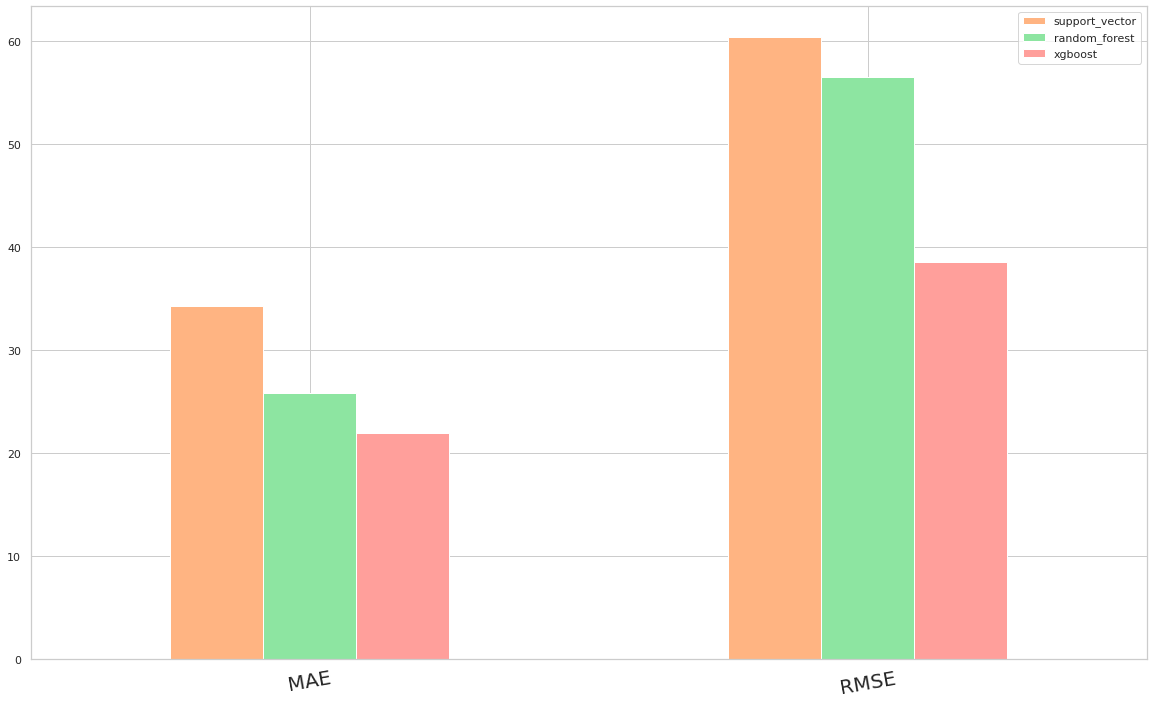

In [59]:
errors = {
    "support_vector": {
        "MAE": 34.3114114516827,
        "RMSE": 60.387090213952156,
    },
    "random_forest": {
        "MAE": 25.795356693297027,
        "RMSE": 56.58435930814151,
    },
    "xgboost": {
        "MAE": 21.935468828495246,
        "RMSE": 38.60491171048423,
    },
}
pd.DataFrame(errors).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);
plt.xticks(rotation = 10, fontsize=20)
plt.show()

## Hyperparameter Tuning on XGBoost Model

In [60]:
pip install optuna

     |████████████████████████████████| 308 kB 2.7 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 210 kB 53.3 MB/s 
     |████████████████████████████████| 78 kB 5.9 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 113 kB 52.3 MB/s 
     |████████████████████████████████| 150 kB 51.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=fa685bb7915383775515073ca98280da8f4c4953cff759b2b71cfb56aa9f4b15
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [61]:
pip install shap

     |████████████████████████████████| 564 kB 3.2 MB/s 


In [62]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


import optuna

import tqdm
import joblib

import shap


In [63]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def xgboost_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = XGBRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [64]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [65]:
%%time
xgb_param, xgb_score = tuner(xgboost_objective,1)
xgb_tuned_model = XGBRegressor(**xgb_param)

[I 2022-03-17 20:05:24,136] A new study created in memory with name: no-name-b6e2bd6d-ec48-4c55-9baf-7eb2bab4fd37


[20:05:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2022-03-17 20:32:12,287] Trial 0 finished with value: -36.06412496518006 and parameters: {'n_estimators': 399, 'max_depth': 19, 'min_samples_split': 8, 'max_features': 0.8435977870055641}. Best is trial 0 with value: -36.06412496518006.


Best score: -36.06412496518006
Optimized parameters: {'n_estimators': 399, 'max_depth': 19, 'min_samples_split': 8, 'max_features': 0.8435977870055641}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
CPU times: user 26min 43s, sys: 2.57 s, total: 26min 46s
Wall time: 26min 48s


In [66]:
xgb_tuned_model.fit(X_train, y_train)

[20:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=19, max_features=0.8435977870055641, min_samples_split=8,
             n_estimators=399)

In [67]:
X = train.drop('site_eui',axis=1)
train_X = pd.DataFrame(X_train,columns=X.columns)

Text(0.5, 0, 'iteration')

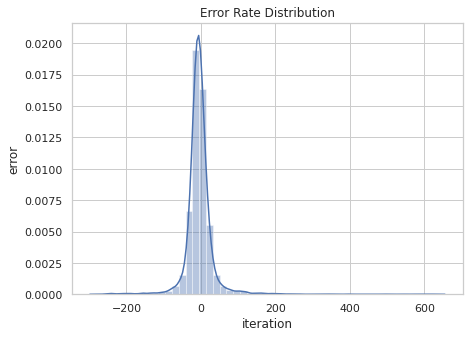

In [68]:
#Final Evaluation
y_hat_tuned = xgb.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

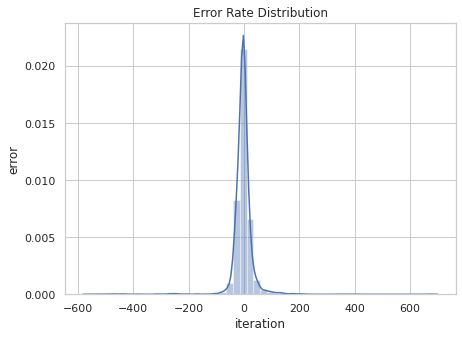

In [69]:
y_hat_tuned = xgb_tuned_model.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

In [70]:
pip install pickle5

     |████████████████████████████████| 256 kB 4.0 MB/s 


In [71]:
import pickle

In [72]:
# save model
joblib.dump(xgb_tuned_model, 'xgb_tuned_model.sav')
['xgb_tuned_model.sav']

['xgb_tuned_model.sav']

In [73]:
## Explainable AI

In [74]:
X_sample = train_X.sample(2000)
X_sample

Year_Factor  floor_area    year_built  energy_star_rating  ELEVATION  \
13780     0.100301   -0.108032  2.018784e-01            0.495334  -0.714713   
17505     0.100301   -0.272703 -5.909674e-02            0.870477   1.363204   
11470     0.100301   -0.157285  4.411056e-01            1.245620  -0.554793   
23314    -1.580960   -0.112996  6.147043e-03            0.000000  -0.714713   
10422     0.100301   -0.240150  4.944906e-15            1.454033  -0.554793   
...            ...         ...           ...                 ...        ...   
21239    -0.740330   -0.393375 -6.462908e-01            0.000000   0.624226   
17380     0.100301   -0.326626  4.411056e-01           -2.464125   1.473998   
10040     0.940931   -0.448908  8.760642e-01           -0.254951  -0.469084   
12101     0.100301   -0.347689  5.715932e-01            0.000000  -0.284078   
13285     0.100301   -0.424488 -1.189989e+00            1.203937  -0.284078   

       january_min_temp  january_avg_temp  january_max_temp  \
13780         -0.527480         -0.677089         -1.205225   
17505         -1.606540         -1.425196         -1.549281   
11470          0.821345          0.762333          0.400370   
23314         -0.797245         -0.403548          0.859112   
10422          0.821345          0.762333          0.400370   
...                 ...               ...               ...   
21239         -0.864686         -0.743095          0.285685   
17380         -1.673982         -1.474776         -2.008023   
10040          0.821345          0.579037         -0.402427   
12101         -0.527480         -0.677089         -1.205225   
13285         -0.527480         -0.677089         -1.205225   

       february_min_temp  february_avg_temp  february_max_temp  \
13780          -0.999065          -1.156166           0.024972   
17505          -1.903380          -1.912820          -2.355420   
11470           0.809566           0.735281          -0.213067   
23314          -0.396188          -0.576449          -0.927185   
10422           0.809566           0.735281          -0.213067   
...                  ...                ...                ...   
21239          -0.275612          -0.469303          -0.094047   
17380          -1.541654          -1.970850          -2.593459   
10040           0.930142           0.682602           0.024972   
12101          -0.999065          -1.156166           0.024972   
13285          -0.999065          -1.156166           0.024972   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
13780       -1.004596       -1.024548        0.131127       -0.136110   
17505       -1.623715       -1.555591       -0.224573       -0.775305   
11470        0.371223        0.496312       -0.402423        0.503086   
23314       -0.041523       -1.024134       -2.358772       -1.158822   
10422        0.371223        0.496312       -0.402423        0.503086   
...               ...             ...             ...             ...   
21239       -0.935805       -1.078079       -0.758123       -0.008271   
17380       -1.830088       -1.569577        0.131127       -0.519627   
10040        0.783969        0.326486       -0.402423        0.886603   
12101       -1.004596       -1.024548        0.131127       -0.136110   
13285       -1.004596       -1.024548        0.131127       -0.136110   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
13780        0.266210       -0.758426      0.995256      2.435109   
17505       -1.463904       -1.389654     -1.408369     -0.560541   
11470       -0.584305       -1.389654     -0.206556     -0.928088   
23314       -0.644551        0.924849     -1.808973     -0.172574   
10422       -0.584305       -1.389654     -0.206556     -0.928088   
...               ...             ...           ...           ...   
21239        0.255131       -0.127198      0.995256      1.251671   
17380       -0.789143       -1.600064     -1.208066     -0.034744   
10040     

In [75]:
shap_values = shap.TreeExplainer(xgb_tuned_model).shap_values(X_sample)

In [76]:
shap.initjs()

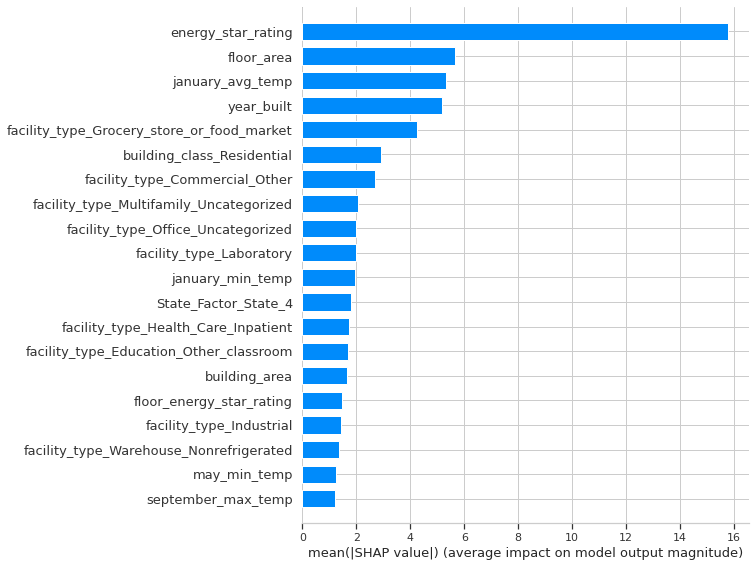

In [77]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

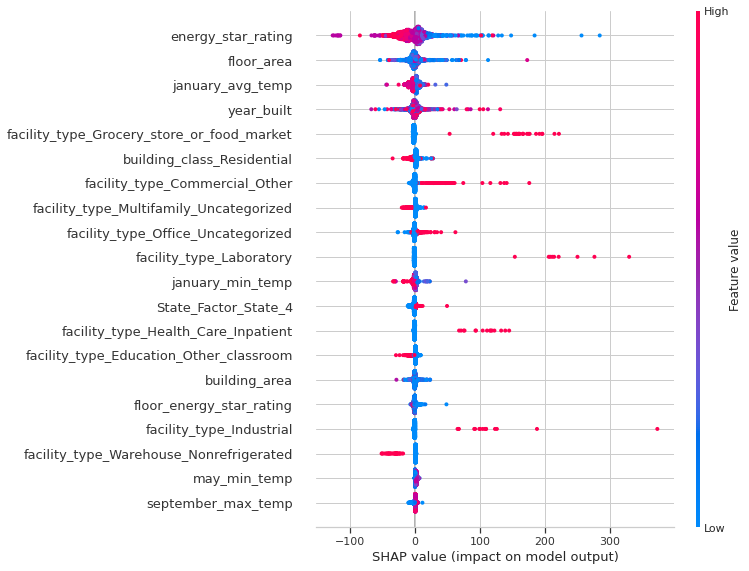

In [78]:
shap.summary_plot(shap_values, X_sample)

In [79]:
limit = 200
shap.force_plot(shap.TreeExplainer(xgb_tuned_model).expected_value[0], shap_values[0:limit,:], X_sample.iloc[0:limit,:])

In [80]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(xgb_tuned_model).expected_value[0], shap_values[row], X_sample.iloc[row])

142.52714584410006


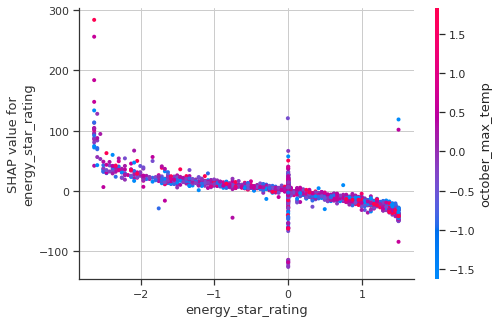

In [81]:
shap.dependence_plot('energy_star_rating', shap_values, X_sample)

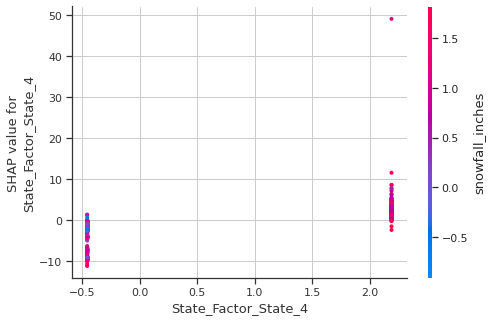

In [82]:
shap.dependence_plot('State_Factor_State_4', shap_values, X_sample)

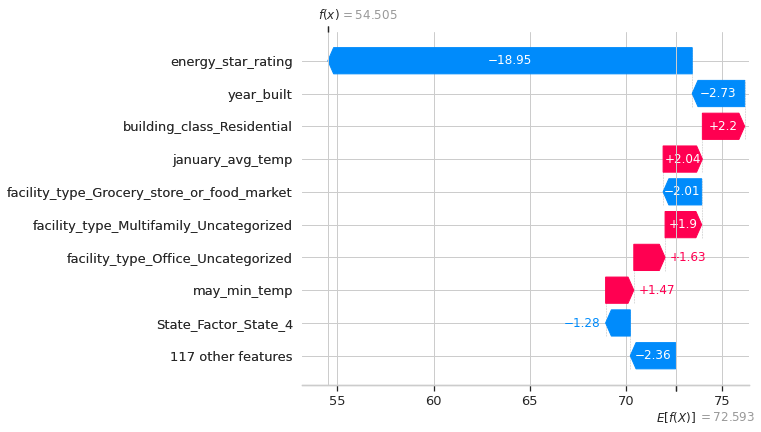

In [83]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(xgb_tuned_model).expected_value[0], 
                                       shap_values[row],
                                       feature_names=X_sample.columns.tolist()
                                      )

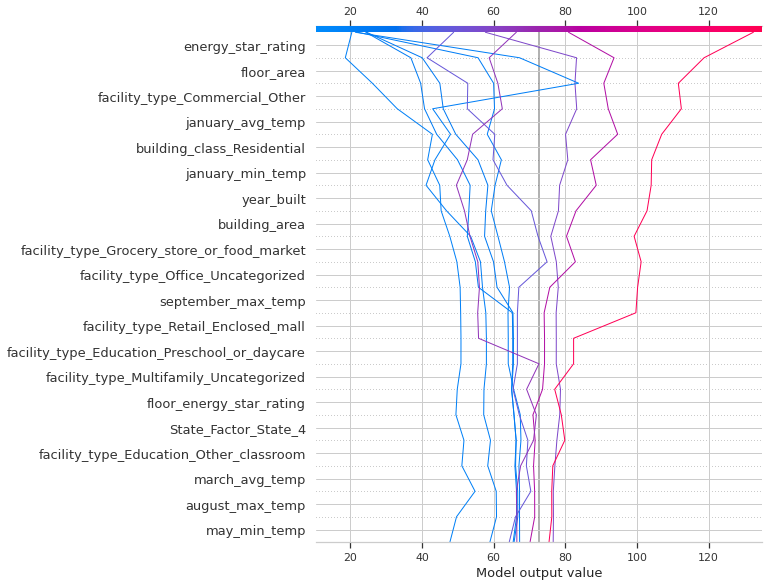

In [84]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(xgb_tuned_model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=X_sample.columns.tolist())

100%|===================| 996/1000 [01:52<00:00]       

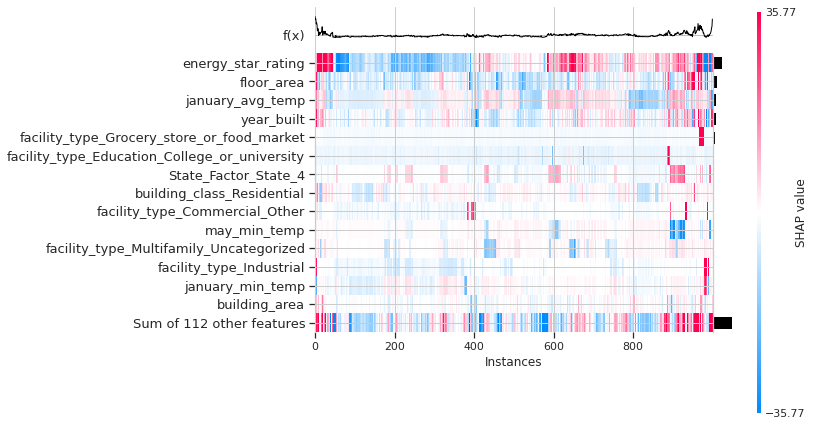

In [85]:
limit = 1000
shap.plots.heatmap(shap.TreeExplainer(xgb_tuned_model, data=X_sample)(X_sample[:limit]), max_display=15)